In [37]:
!pip install langid

import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import langid

In [38]:
data = pd.read_excel(r"C:\Users\asus\Desktop\SMAProject\twitter-suicidal_data.xlsx", sheet_name="in")
data

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
...,...,...
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1


In [39]:
import re
# Find empty strings in the 'tweet' column
missing_values = data['tweet'].apply(lambda x: bool(re.match(r'^\s*$', str(x))))

# Count the number of empty strings
missing_values_count = missing_values.sum()

# Print the count of empty strings
print("Number of empty strings in 'tweet' column:", missing_values_count)

# Check for duplicate values
duplicates = data.duplicated().sum()
print("\nDuplicate values:")
print(duplicates)

Number of empty strings in 'tweet' column: 10

Duplicate values:
333


In [40]:
# Remove duplicate values from the DataFrame
data = data.drop_duplicates(subset='tweet').copy()

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(data)

                                                  tweet  intention
0     my life is meaningless i just want to end my l...          1
1     muttering i wanna die to myself daily for a fe...          1
2     work slave i really feel like my only purpose ...          1
3     i did something on the 2 of october i overdose...          1
4     i feel like no one cares i just want to die ma...          1
...                                                 ...        ...
8780  have you ever laid on your bed at night and cr...          1
8781  the fault the blame the pain s still there i m...          1
8782  stop asking me to trust you when i m still cou...          1
8783  i never know how to handle sadness crying make...          1
8784  when cancer takes a life we blame cancer depre...          1

[8785 rows x 2 columns]


In [41]:
# Define the path for the new CSV file
cleaned_data = 'cleaned_data.csv'

# Save the cleaned DataFrame to the new CSV file
data.to_csv(cleaned_data, index=False)

# Print a message to confirm the file has been saved
print("Cleaned data saved to", cleaned_data)

Cleaned data saved to cleaned_data.csv


In [42]:
cleaned_data = pd.read_csv("Cleaned_data.csv")
# Create a language identifier object
identifier = langid.langid.LanguageIdentifier.from_modelstring(langid.langid.model, norm_probs=True)

# Create a new column to store the identified language
cleaned_data['Language'] = cleaned_data['tweet'].apply(lambda x: identifier.classify(x)[0])

# Save the updated DataFrame to a new CSV file
new_csv_file_path = 'New_Tweet.csv'
cleaned_data.to_csv(new_csv_file_path, index=False)

new_data = pd.read_csv('New_Tweet.csv')
new_data

,tweet,intention,Language
0,my life is meaningless i just want to end my l...,1,en
1,muttering i wanna die to myself daily for a fe...,1,en
2,work slave i really feel like my only purpose ...,1,en
3,i did something on the 2 of october i overdose...,1,en
4,i feel like no one cares i just want to die ma...,1,en
...,...,...,...
8780,have you ever laid on your bed at night and cr...,1,en
8781,the fault the blame the pain s still there i m...,1,en
8782,stop asking me to trust you when i m still cou...,1,en
8783,i never know how to handle sadness crying make...,1,en


In [43]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('New_Tweet.csv')

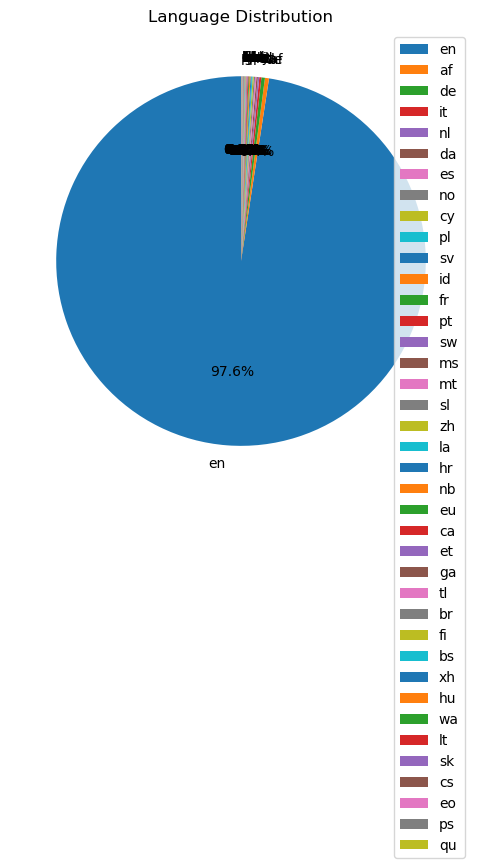

In [44]:
# Count the occurrences of each language
language_counts = data['Language'].value_counts()
# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=90)

# Add legend
plt.legend(labels=language_counts.index, loc='best')

# Add marker
plt.gca().set_aspect("equal")
plt.title('Language Distribution')
plt.show()

In [45]:
# Calculate the percentages
language_percentages = (language_counts / language_counts.sum()) * 100

# Create a new DataFrame
language_df = pd.DataFrame({'Language': language_counts.index, 'Percentage': language_percentages})

# Sort the DataFrame by percentage in descending order
language_df = language_df.sort_values(by='Percentage', ascending=False)

# Reset the index of the DataFrame
language_df = language_df.reset_index(drop=True)

# Display the DataFrame
print(language_df)

   Language  Percentage
0        en   97.575413
1        af    0.352874
2        de    0.307342
3        it    0.182129
4        nl    0.125213
5        da    0.125213
6        es    0.113830
7        no    0.113830
8        cy    0.102447
9        id    0.091064
10       pl    0.091064
11       sv    0.091064
12       fr    0.079681
13       pt    0.079681
14       sw    0.056915
15       ms    0.045532
16       mt    0.045532
17       sl    0.045532
18       la    0.034149
19       zh    0.034149
20       nb    0.022766
21       eu    0.022766
22       ca    0.022766
23       et    0.022766
24       ga    0.022766
25       tl    0.022766
26       br    0.022766
27       hr    0.022766
28       lt    0.011383
29       ps    0.011383
30       eo    0.011383
31       cs    0.011383
32       sk    0.011383
33       bs    0.011383
34       wa    0.011383
35       hu    0.011383
36       xh    0.011383
37       fi    0.011383
38       qu    0.011383


In [46]:

# Load the updated DataFrame from the CSV file
new_data = pd.read_csv('New_Tweet.csv')

# Count the occurrences of 1s and 0s for English tweets
english_tweets = new_data[new_data['Language'] == 'en']
english_intentions_count = english_tweets['intention'].value_counts()
english_total_1_count = english_intentions_count.get(1, 0)
english_total_0_count = english_intentions_count.get(0, 0)

# Count the occurrences of 1s and 0s for the entire dataset
total_intentions_count = new_data['intention'].value_counts()
total_total_1_count = total_intentions_count.get(1, 0)
total_total_0_count = total_intentions_count.get(0, 0)

# Print the results
print("English Tweets - Total Count of 1s:", english_total_1_count)
print("English Tweets - Total Count of 0s:", english_total_0_count)
print("Entire Dataset - Total Count of 1s:", total_total_1_count)
print("Entire Dataset - Total Count of 0s:", total_total_0_count)


English Tweets - Total Count of 1s: 3924
English Tweets - Total Count of 0s: 4648
Entire Dataset - Total Count of 1s: 3958
Entire Dataset - Total Count of 0s: 4827


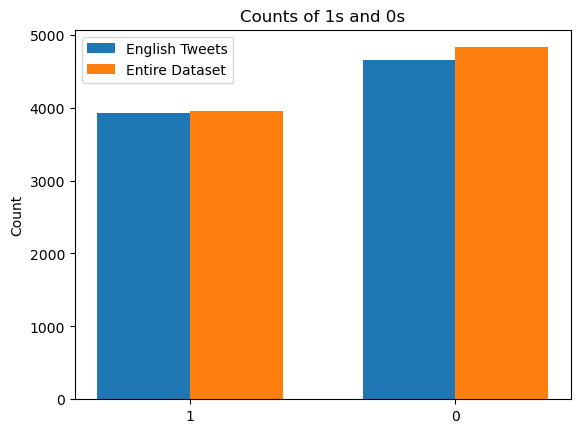

In [47]:
import matplotlib.pyplot as plt

# Load the updated DataFrame from the CSV file
new_data = pd.read_csv('New_Tweet.csv')

# Count the occurrences of 1s and 0s for English tweets
english_tweets = new_data[new_data['Language'] == 'en']
english_intentions_count = english_tweets['intention'].value_counts()
english_total_1_count = english_intentions_count.get(1, 0)
english_total_0_count = english_intentions_count.get(0, 0)

# Count the occurrences of 1s and 0s for the entire dataset
total_intentions_count = new_data['intention'].value_counts()
total_total_1_count = total_intentions_count.get(1, 0)
total_total_0_count = total_intentions_count.get(0, 0)

# Create a bar plot
labels = ['1', '0']
english_counts = [english_total_1_count, english_total_0_count]
total_counts = [total_total_1_count, total_total_0_count]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x, english_counts, width, label='English Tweets')
ax.bar([i + width for i in x], total_counts, width, label='Entire Dataset')

ax.set_ylabel('Count')
ax.set_title('Counts of 1s and 0s')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Step 1: Split the dataset
X = new_data[new_data['Language'] == 'en']['tweet']
y = new_data[new_data['Language'] == 'en']['intention']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Preprocess the text data
stopwords_english = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove symbols and non-ASCII characters
    text = re.sub(r'[^\w\s]', '', text)
    text = text.encode("ascii", "ignore").decode()
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords_english]
    # Join tokens back to text
    text = ' '.join(tokens)
    return text

pipeline = Pipeline([
    ('vect', CountVectorizer(preprocessor=preprocess_text)),
    ('tfidf', TfidfTransformer()),
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 3: Train multiple machine learning models
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()

model1.fit(X_train_processed, y_train)
model2.fit(X_train_processed, y_train)
model3.fit(X_train_processed, y_train)
model4.fit(X_train_processed, y_train)

# Step 4: Evaluate model performance
y_pred1 = model1.predict(X_test_processed)
y_pred2 = model2.predict(X_test_processed)
y_pred3 = model3.predict(X_test_processed)
y_pred4 = model4.predict(X_test_processed)

precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
accuracy1 = accuracy_score(y_test, y_pred1)

precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)

precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)

precision4 = precision_score(y_test, y_pred4)
recall4 = recall_score(y_test, y_pred4)
accuracy4 = accuracy_score(y_test, y_pred4)

print("Model 1 - Logistic Regression:")
print("Precision:", precision1)
print("Recall:", recall1)
print("Accuracy:", accuracy1)
print()

print("Model 2 - Support Vector Machines:")
print("Precision:", precision2)
print("Recall:", recall2)
print("Accuracy:", accuracy2)
print()

print("Model 3 - Random Forest:")
print("Precision:", precision3)
print("Recall:", recall3)
print("Accuracy:", accuracy3)
print()

print("Model 4 - Gradient Boosting:")
print("Precision:", precision4)
print("Recall:", recall4)
print("Accuracy:", accuracy4)
print()




Model 1 - Logistic Regression:
Precision: 0.9416517055655296
Recall: 0.8605414273995078
Accuracy: 0.9086314152410575

Model 2 - Support Vector Machines:
Precision: 0.947606142728094
Recall: 0.8605414273995078
Accuracy: 0.911353032659409

Model 3 - Random Forest:
Precision: 0.9675881792183031
Recall: 0.8326497128794094
Accuracy: 0.9074650077760498

Model 4 - Gradient Boosting:
Precision: 0.9379115710253998
Recall: 0.8178835110746514
Accuracy: 0.8880248833592534



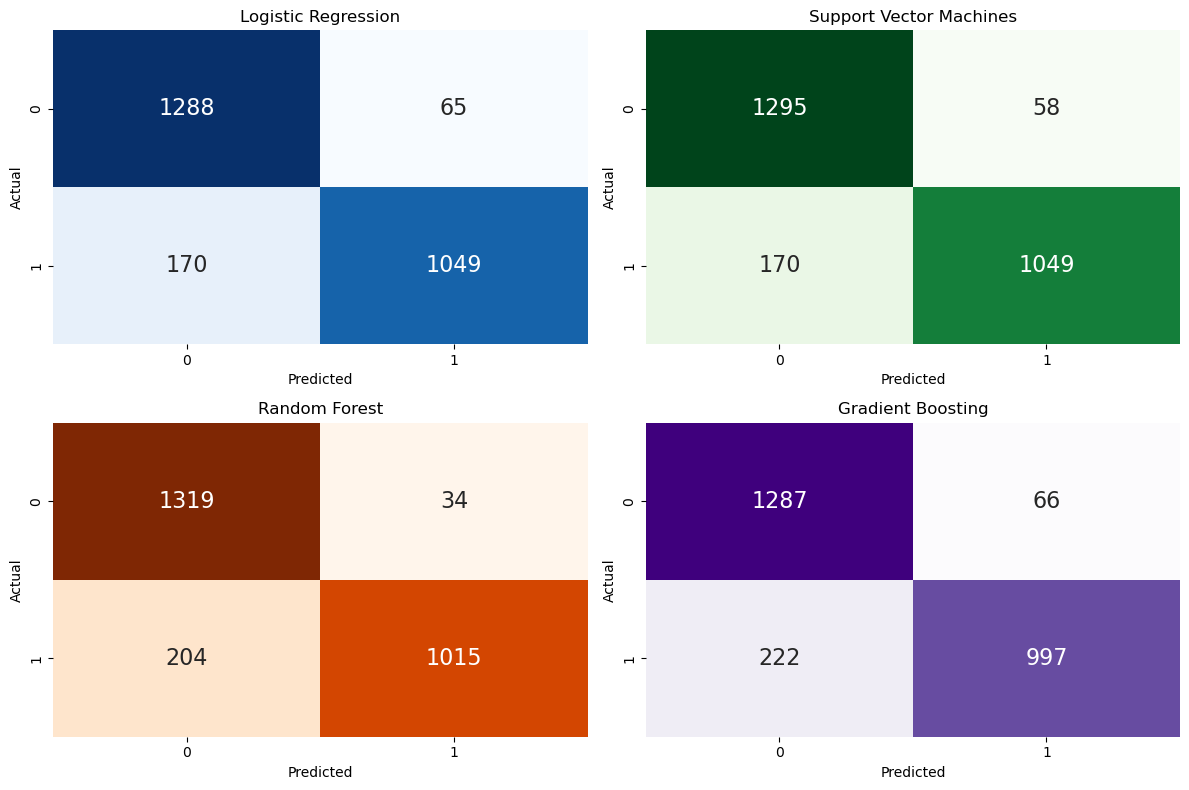

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrices for all four models
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)

# Define custom color palettes for each heatmap
palette1 = 'Blues'
palette2 = 'Greens'
palette3 = 'Oranges'
palette4 = 'Purples'

# Create subplots for all four heatmaps
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the heatmaps using different color palettes and larger font size
sns.heatmap(cm1, annot=True, cmap=palette1, fmt="d", cbar=False, ax=axs[0, 0], annot_kws={"size": 16})
axs[0, 0].set_xlabel('Predicted')
axs[0, 0].set_ylabel('Actual')
axs[0, 0].set_title('Logistic Regression')

sns.heatmap(cm2, annot=True, cmap=palette2, fmt="d", cbar=False, ax=axs[0, 1], annot_kws={"size": 16})
axs[0, 1].set_xlabel('Predicted')
axs[0, 1].set_ylabel('Actual')
axs[0, 1].set_title('Support Vector Machines')

sns.heatmap(cm3, annot=True, cmap=palette3, fmt="d", cbar=False, ax=axs[1, 0], annot_kws={"size": 16})
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('Actual')
axs[1, 0].set_title('Random Forest')

sns.heatmap(cm4, annot=True, cmap=palette4, fmt="d", cbar=False, ax=axs[1, 1], annot_kws={"size": 16})
axs[1, 1].set_xlabel('Predicted')
axs[1, 1].set_ylabel('Actual')
axs[1, 1].set_title('Gradient Boosting')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()



In [94]:
# Calculate TP, FP, FN, TN for each model
tp1, fp1, fn1, tn1 = cm1[1, 1], cm1[0, 1], cm1[1, 0], cm1[0, 0]
tp2, fp2, fn2, tn2 = cm2[1, 1], cm2[0, 1], cm2[1, 0], cm2[0, 0]
tp3, fp3, fn3, tn3 = cm3[1, 1], cm3[0, 1], cm3[1, 0], cm3[0, 0]
tp4, fp4, fn4, tn4 = cm4[1, 1], cm4[0, 1], cm4[1, 0], cm4[0, 0]

# Display TP, FP, FN, TN for each model
print("Model 1 - Logistic Regression:")
print("True Positives:", tp1)
print("False Positives:", fp1)
print("False Negatives:", fn1)
print("True Negatives:", tn1)
print()

print("Model 2 - Support Vector Machines:")
print("True Positives:", tp2)
print("False Positives:", fp2)
print("False Negatives:", fn2)
print("True Negatives:", tn2)
print()

print("Model 3 - Random Forest:")
print("True Positives:", tp3)
print("False Positives:", fp3)
print("False Negatives:", fn3)
print("True Negatives:", tn3)
print()

print("Model 4 - Gradient Boosting:")
print("True Positives:", tp4)
print("False Positives:", fp4)
print("False Negatives:", fn4)
print("True Negatives:", tn4)
print()


Model 1 - Logistic Regression:
True Positives: 1049
False Positives: 65
False Negatives: 170
True Negatives: 1288

Model 2 - Support Vector Machines:
True Positives: 1049
False Positives: 58
False Negatives: 170
True Negatives: 1295

Model 3 - Random Forest:
True Positives: 1015
False Positives: 34
False Negatives: 204
True Negatives: 1319

Model 4 - Gradient Boosting:
True Positives: 997
False Positives: 66
False Negatives: 222
True Negatives: 1287



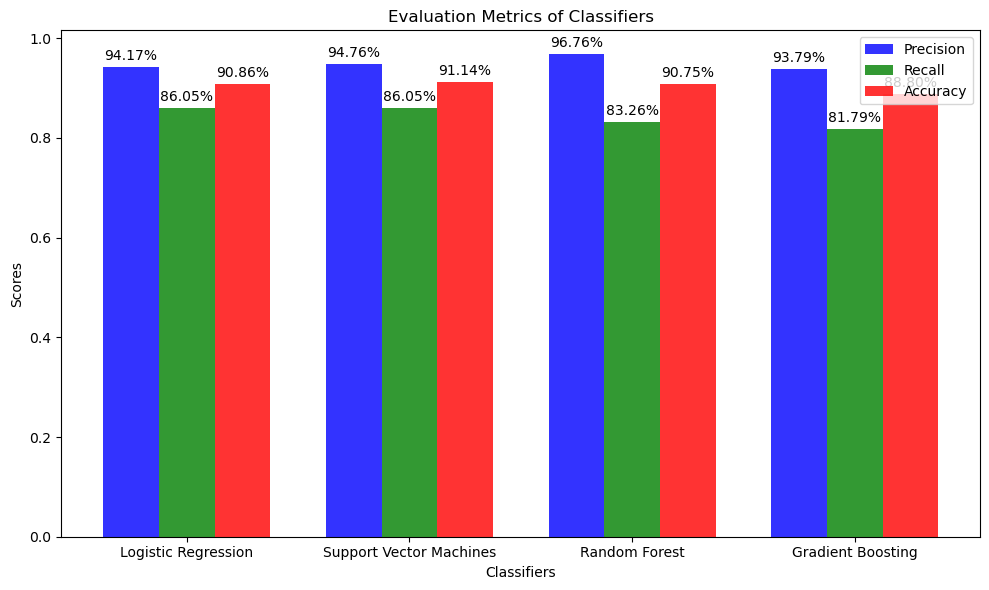

In [88]:
# Evaluation metric scores
models = ['Logistic Regression', 'Support Vector Machines', 'Random Forest', 'Gradient Boosting']
precision = [precision1, precision2, precision3, precision4]
recall = [recall1, recall2, recall3, recall4]
accuracy = [accuracy1, accuracy2, accuracy3, accuracy4]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(models))

bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, precision, bar_width,
                alpha=opacity,
                color='b',
                label='Precision')

rects2 = ax.bar([i + bar_width for i in index], recall, bar_width,
                alpha=opacity,
                color='g',
                label='Recall')

rects3 = ax.bar([i + 2 * bar_width for i in index], accuracy, bar_width,
                alpha=opacity,
                color='r',
                label='Accuracy')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics of Classifiers')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

# Add percentage values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()



In [74]:
!pip install spacy
!python -m spacy download en_core_web_sm
import nltk
import spacy
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Download necessary resources
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Retrieve predicted labels and text data
predicted_labels = model2.predict(X_test_processed)  # Replace 'model' with the trained model you want to use
text_data = X_test.tolist()

# Preprocess text by removing stop words
stop_words = set(stopwords.words('english'))
custom_stop_words = set(["i'm", "it's", "that's", "i've","one","want","ive","know","get","make","would","even"])  # Add any custom stopwords relevant to your text data
all_stop_words = stop_words.union(custom_stop_words)

preprocessed_text = []

for text in text_data:
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in all_stop_words and len(token) > 2]  # Filter stopwords and short words
    preprocessed_text.append(filtered_tokens)

# Identify verbs using POS tagging
verbs = []

for tokens in preprocessed_text:
    tagged_tokens = pos_tag(tokens)
    verbs.extend([token for token, tag in tagged_tokens if tag.startswith('VB')])

# Extract named entities using spaCy
named_entities = []

for text in text_data:
    doc = nlp(text)
    entities = [entity.text for entity in doc.ents if entity.label_ != 'CARDINAL']  # Exclude cardinal number entities
    named_entities.extend(entities)

# Remove common words from named entities
common_words = set(["i", "you", "he", "she", "it", "we", "they"])
named_entities = [entity for entity in named_entities if entity.lower() not in common_words]

# Count occurrences of keywords, named entities, and verbs
keyword_counts = Counter([token for tokens in preprocessed_text for token in tokens])
named_entity_counts = Counter(named_entities)
verb_counts = Counter(verbs)

# Get top-10 keywords, named entities, and verbs
top_10_keywords = keyword_counts.most_common(10)
top_10_named_entities = named_entity_counts.most_common(10)
top_10_verbs = verb_counts.most_common(10)

# Print the results
print("Top 10 Keywords:")
for keyword, count in top_10_keywords:
    print(keyword, "-", count)

print("\nTop 10 Named Entities:")
for entity, count in top_10_named_entities:
    print(entity, "-", count)

print("\nTop 10 Verbs:")
for verb, count in top_10_verbs:
    print(verb, "-", count)


     ---------------------------------------- 12.8/12.8 MB 3.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Top 10 Keywords:
dont - 1363
like - 1136
feel - 1005
life - 909
cant - 758
time - 613
really - 586
die - 557
people - 553
going - 535

Top 10 Named Entities:
first - 153
today - 139
tonight - 86
tomorrow - 63
years - 54
nowi - 41
mei - 40
second - 37
yesterday - 33
the day - 32

Top 10 Verbs:
going - 535
feel - 482
think - 417
got - 346
see - 238
kill - 227
trying - 217
fucking - 210
take - 208
say - 202


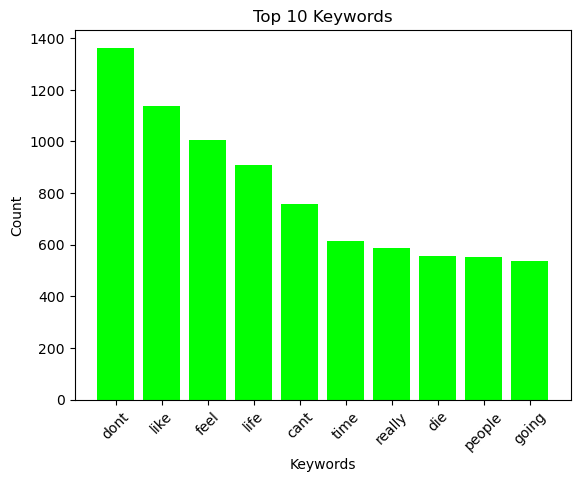

In [53]:
# Visualization 1
# Extract keywords

keywords = [keyword for keyword, count in top_10_keywords]
counts = [count for keyword, count in top_10_keywords]

# Create a bar chart
plt.bar(keywords, counts, color='#00FF00')

# Add labels and title
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Top 10 Keywords')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [1]:
# Visualization 2
# Etract keywords
! pip install wordcloud
from wordcloud import WordCloud
# Generate Word Cloud for top 10 keywords
keywords = dict(top_10_keywords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keywords)


plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Top 10 Keywords')
plt.axis('off')
plt.show()


NameError: name 'top_10_keywords' is not defined

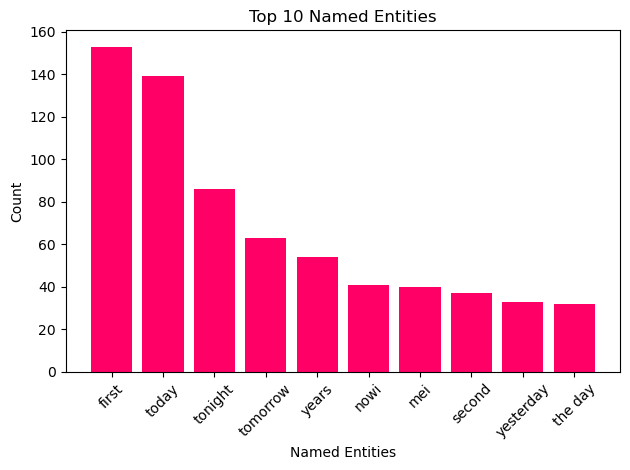

In [84]:
# Visualization 1
# Named entities

# Get the top 10 named entities and their counts
entities = [entity for entity, count in top_10_named_entities]
counts = [count for entity, count in top_10_named_entities]

# Create a bar chart for named entities

plt.bar(entities, counts, color=['#FF0066'])  # Customize colors as per your preference
plt.title('Top 10 Named Entities')
plt.xlabel('Named Entities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

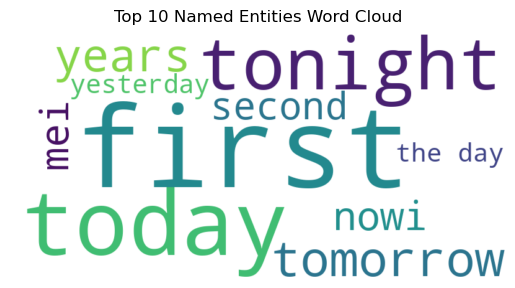

In [59]:
# Visualization 2
# named enitity

!pip install wordcloud
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate word cloud data
wordcloud_data = {entity: count for entity, count in top_10_named_entities}

# Generate the word cloud
wordcloud.generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Named Entities Word Cloud')

# Display the plot
plt.show()


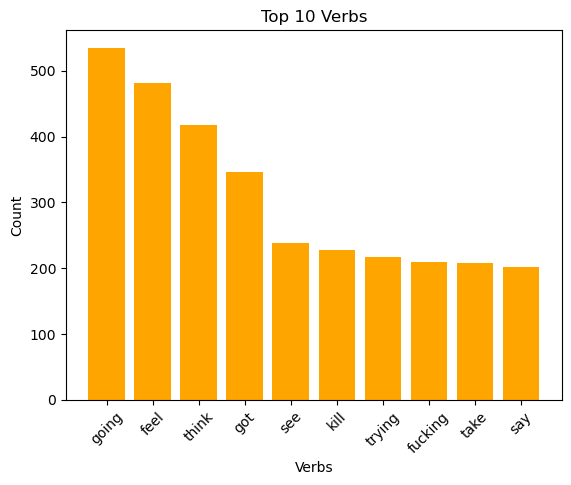

In [60]:
# Visualization 1
# Verbs

# Extract verbs and counts
verbs = [verb for verb, count in top_10_verbs]
counts = [count for verb, count in top_10_verbs]

# Create a bar chart
plt.bar(verbs, counts, color=['#FFA500'])

# Add labels and title
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title('Top 10 Verbs')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


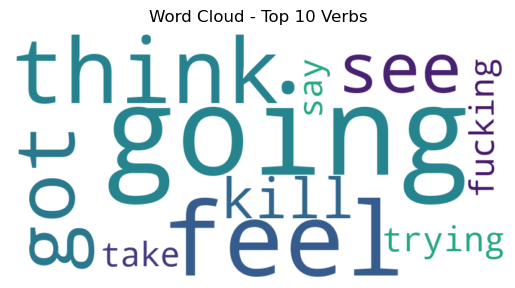

In [85]:
# Visualization 2
# Verbs

# Generate Word Cloud for top 10 verbs
verbs = dict(top_10_verbs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(verbs)


plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Top 10 Verbs')
plt.axis('off')
plt.show()

In [81]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the text data
sentiment_scores = [sid.polarity_scores(text) for text in text_data]

# Calculate the total count for each sentiment category
positive_count = sum(score['pos'] > score['neg'] for score in sentiment_scores)
negative_count = sum(score['neg'] > score['pos'] for score in sentiment_scores)
neutral_count = sum(score['neu'] == score['pos'] == score['neg'] for score in sentiment_scores)

# Calculate the total percentage for each sentiment category
total_count = len(text_data)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

# Print the results
print("Sentiment Analysis Results:")
print("Positive Sentiment Percentage:", positive_percentage)
print("Negative Sentiment Percentage:", negative_percentage)
print("Neutral Sentiment Percentage:", neutral_percentage)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis Results:
Positive Sentiment Percentage: 28.771384136858476
Negative Sentiment Percentage: 59.91446345256609
Neutral Sentiment Percentage: 0.038880248833592534


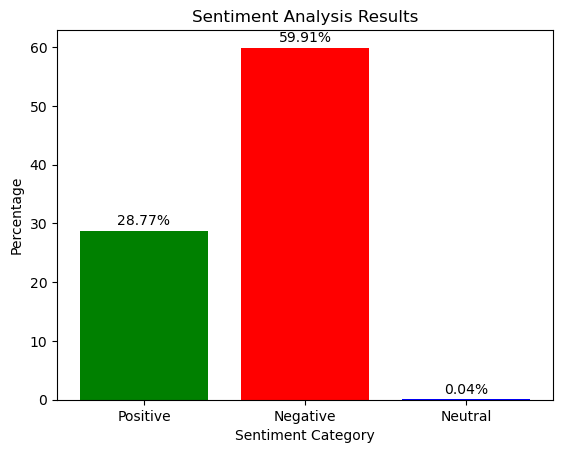

In [82]:


# Prepare the data for visualization
sentiment_categories = ['Positive', 'Negative', 'Neutral']
sentiment_percentages = [positive_percentage, negative_percentage, neutral_percentage]

# Create a bar plot
plt.bar(sentiment_categories, sentiment_percentages, color=['green', 'red', 'blue'])

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis Results')

# Add percentage values above each bar
for i, percentage in enumerate(sentiment_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

# Display the plot
plt.show()


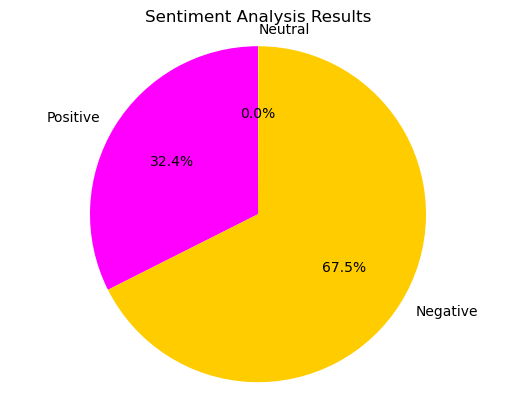

In [83]:
# Prepare the data for visualization
sentiment_categories = ['Positive', 'Negative', 'Neutral']
sentiment_percentages = [positive_percentage, negative_percentage, neutral_percentage]

# Define custom colors in fluorescent red and yellow
colors = ['#ff00ff', '#ffcc00', '#ffff00']

# Create a pie chart with custom colors
plt.pie(sentiment_percentages, labels=sentiment_categories, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title
plt.title('Sentiment Analysis Results')

# Set aspect ratio to be equal, ensuring a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()

